In [1]:
# Import the libraries
import pandas as pd

In [2]:
# Read in the dataset
df = pd.read_sas('../data/LLCP2017.XPT', encoding='utf-8')
#df = pd.read_csv('../data/2017_diabetes_cleaned.csv')

/opt/conda/lib/python3.7/site-packages/pandas/io/sas/sas_xport.py:475: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[x] = v


In [137]:
# check number of rows and columns
df.shape

(450016, 358)

In [138]:
# check the dataframe
df.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
0,1.0,1.0,01302017,01,30,2017,1100.0,2017000001,2.017000e+09,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,01122017,01,12,2017,1100.0,2017000002,2.017000e+09,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,01102017,01,10,2017,1100.0,2017000003,2.017000e+09,1.0,...,3.0,2.0,2.0,4.0,2.0,1.0,1.0,1.0,1.0,2.0
3,1.0,1.0,02082017,02,08,2017,1200.0,2017000004,2.017000e+09,1.0,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,NaN
4,1.0,1.0,01302017,01,30,2017,1100.0,2017000005,2.017000e+09,1.0,...,3.0,2.0,2.0,4.0,2.0,1.0,2.0,2.0,2.0,2.0


In [139]:
## Before we dive into deeper analysis, we would like to examine the overall picture of diabetes statistics.

In [301]:
## We have picked up variables of individual health condition and demography
df_over = df[['DIABETE3','_BMI5','_BMI5CAT','_MICHD','_RFCHOL1','_RFHYPE5','_RFDRHV5','_SMOKER3','_INCOMG','SEX','_AGE_G']]

In [302]:
# drop missing values
df_over = df_over.dropna()

In [303]:
# cleanding variable : DIABETE3 
df_over = df_over[df_over['DIABETE3'] != 7]
df_over = df_over[df_over['DIABETE3'] != 9]
df_over['DIABETE3'] = df_over['DIABETE3'].astype(int)
df_over['DIABETE3'].replace({2: 'No Diab',3:'No Diab',1:'Diab',4:'Diab'},inplace=True)
df_over['DIABETE3'].value_counts()

No Diab    304363
Diab        59845
Name: DIABETE3, dtype: int64

In [304]:
# cleanding variable : _BMI5CAT
 # Four-categories of Body Mass Index (BMI)
df_over['_BMI5CAT'] = df_over['_BMI5CAT'].astype(int)
df_over['_BMI5CAT'].replace({1:'01_Underweight',2:'02_Normal Weight',3:'03_Overweight',4:'04_Obese'},inplace=True)
df_over['_BMI5CAT'].value_counts()

03_Overweight       133239
04_Obese            116372
02_Normal Weight    109137
01_Underweight        5460
Name: _BMI5CAT, dtype: int64

In [305]:
# cleanding variable : _MICHD
 # Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)
df_over['_MICHD'] = df_over['_MICHD'].astype(int)
df_over['_MICHD'].replace({1:'Yes',2:'No'},inplace=True)
df_over['_MICHD'].value_counts()

No     328864
Yes     35344
Name: _MICHD, dtype: int64

In [306]:
# cleanding variable : _RFCHOL1
 # Adults who have had their cholesterol checked and have been told by a doctor, nurse, or other health professional that it was high
df_over['_RFCHOL1'] = df_over['_RFCHOL1'].astype(int)
df_over['_RFCHOL1'].replace({1:'No',2:'Yes'},inplace=True)
df_over['_RFCHOL1'].value_counts()

No     219931
Yes    144277
Name: _RFCHOL1, dtype: int64

In [307]:
# cleanding variable : _RFHYPE5
 # Adults who have been told they have high blood pressure by a doctor, nurse, or other health professional
df_over['_RFHYPE5'] = df_over['_RFHYPE5'].astype(int)
df_over = df_over[df_over['_RFHYPE5'] != 9]
df_over['_RFHYPE5'].replace({1:'No',2:'Yes'},inplace=True)
df_over['_RFHYPE5'].value_counts()

No     207434
Yes    156150
Name: _RFHYPE5, dtype: int64

In [308]:
# cleanding variable : _RFDRHV5
 # Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week)
df_over['_RFDRHV5'] = df_over['_RFDRHV5'].astype(int)
df_over = df_over[df_over['_RFDRHV5'] != 9]
df_over['_RFDRHV5'].replace({1:'No',2:'Yes'},inplace=True)
df_over['_RFDRHV5'].value_counts()

No     327250
Yes     20128
Name: _RFDRHV5, dtype: int64

In [309]:
# cleanding variable : _SMOKER3
 # Four-level smoker status: Everyday smoker, Someday smoker, Former smoker, Non-smoker
df_over['_SMOKER3'] = df_over['_SMOKER3'].astype(int)
df_over = df_over[df_over['_SMOKER3'] != 9]
df_over['_SMOKER3'].replace({1:'Current smoker(everyday)',2:'Current smoker(someday)',3:'Former smoker',4:'Never Smoked'},inplace=True)
df_over['_SMOKER3'].value_counts()

Never Smoked                195090
Former smoker               102602
Current smoker(everyday)     33750
Current smoker(someday)      14338
Name: _SMOKER3, dtype: int64

In [310]:
# cleanding variable : _INCOMG
 # Income categories
df_over['_INCOMG'] = df_over['_INCOMG'].astype(int)
df_over = df_over[df_over['_INCOMG'] != 9]
df_over['_INCOMG'].replace({1:'1.Less than $15,000',
                            2:'2.$15,000 to less than $25,000',
                            3:'3.$25,000 to less than $35,000',
                            4:'4.$35,000 to less than $50,000',
                            5:'5.$50,000 or more'},inplace=True)
df_over['_INCOMG'].value_counts()

5.$50,000 or more                 153904
2.$15,000 to less than $25,000     46790
4.$35,000 to less than $50,000     42664
3.$25,000 to less than $35,000     31082
1.Less than $15,000                27762
Name: _INCOMG, dtype: int64

In [311]:
# cleanding variable : SEX
 # Indicate sex of respondent.
df_over['SEX'] = df_over['SEX'].astype(int)
df_over = df_over[df_over['SEX'] != 9]
df_over['SEX'].replace({1:'Male',2:'Female',},inplace=True)
df_over['SEX'].value_counts()

Female    163176
Male      138970
Name: SEX, dtype: int64

In [312]:
# cleanding variable : _AGE_G
 # Six-level imputed age category
df_over['_AGE_G'] = df_over['_AGE_G'].astype(int)
df_over['_AGE_G'].replace({1:'Age 18 to 24', 2:'Age 25 to 34',3:'Age 35 to 44',4:'Age 45 to 54',5:'Age 55 to 64',6: 'Age 65 or older'},inplace=True)
df_over['_AGE_G'].value_counts()

Age 65 or older    108884
Age 55 to 64        71155
Age 45 to 54        50494
Age 35 to 44        35397
Age 25 to 34        26218
Age 18 to 24         9998
Name: _AGE_G, dtype: int64

In [313]:
df_over['DIABETE3'].value_counts()

No Diab    252901
Diab        49245
Name: DIABETE3, dtype: int64

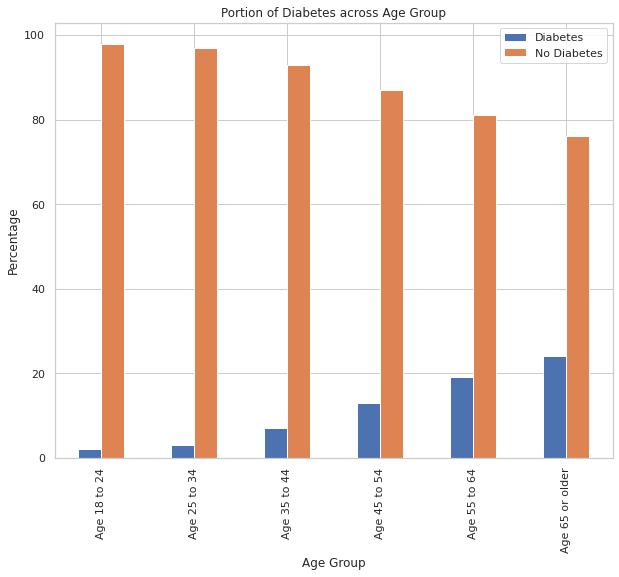

In [314]:
# Diabetes across age group
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,8))
df_over.pipe(lambda df_over:( 
    (pd.crosstab(df_over._AGE_G, df_over.DIABETE3, normalize = 'index').round(2)*100)).plot.bar(ax=ax))
ax.set_title("Portion of Diabetes across Age Group")
ax.set_ylabel("Percentage")
ax.set_xlabel("Age Group")
plt.legend(['Diabetes', 'No Diabetes'],loc='upper right', title='')

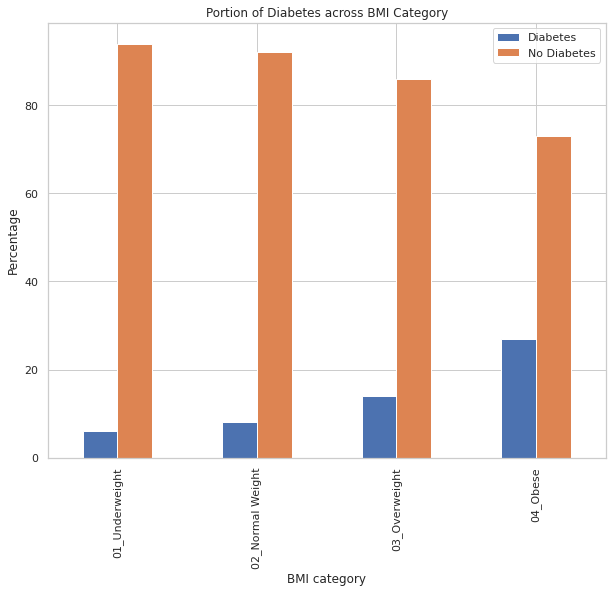

In [ ]:
# Diabetes across BMI categories
fig, ax = plt.subplots(figsize=(10,8))
df_over.pipe(lambda df_over:( 
    (pd.crosstab(df_over._BMI5CAT, df_over.DIABETE3, normalize = 'index').round(2)*100)).
plot.bar(ax=ax))
ax.set_title("Portion of Diabetes across BMI Category")
ax.set_ylabel("Percentage")
ax.set_xlabel("BMI category")
plt.legend(['Diabetes', 'No Diabetes'],loc='upper right', title='')

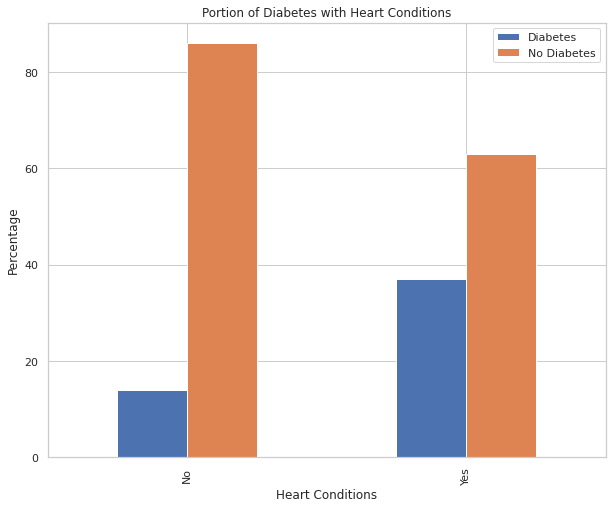

In [316]:
# Diabetes with heart conditions
fig, ax = plt.subplots(figsize=(10,8))
df_over.pipe(lambda df_over:( 
    (pd.crosstab(df_over._MICHD, df_over.DIABETE3, normalize = 'index').round(2)*100)).
plot.bar(ax=ax))
ax.set_title("Portion of Diabetes with Heart Conditions")
ax.set_ylabel("Percentage")
ax.set_xlabel("Heart Conditions")
plt.legend(['Diabetes', 'No Diabetes'],loc='upper right', title='')

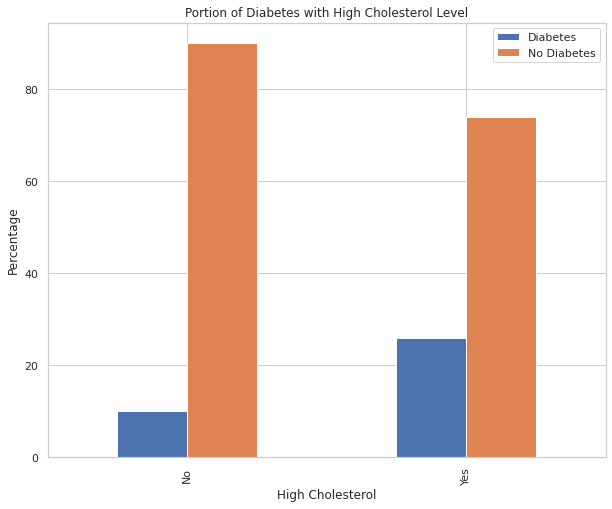

In [317]:
# Diabetes with high cholesterol level
fig, ax = plt.subplots(figsize=(10,8))
df_over.pipe(lambda df_over:( 
    (pd.crosstab(df_over._RFCHOL1, df_over.DIABETE3, normalize = 'index').round(2)*100)).
plot.bar(ax=ax))
ax.set_title("Portion of Diabetes with High Cholesterol Level")
ax.set_ylabel("Percentage")
ax.set_xlabel("High Cholesterol")
plt.legend(['Diabetes', 'No Diabetes'],loc='upper right', title='')

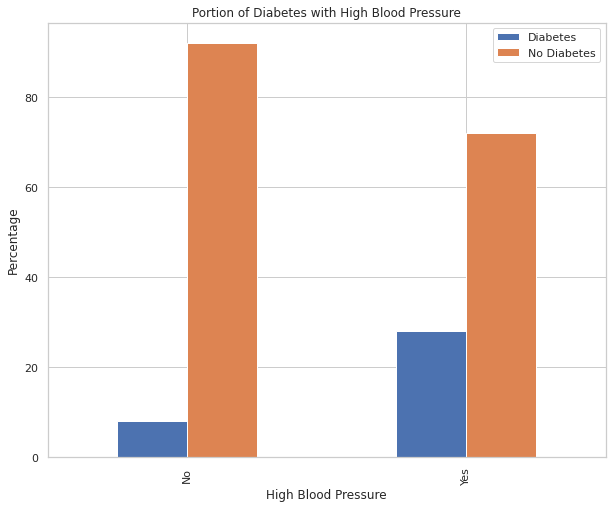

In [318]:
# Diabetes with high blood pressure
fig, ax = plt.subplots(figsize=(10,8))
df_over.pipe(lambda df_over:( 
    (pd.crosstab(df_over._RFHYPE5, df_over.DIABETE3, normalize = 'index').round(2)*100)).
plot.bar(ax=ax))
ax.set_title("Portion of Diabetes with High Blood Pressure")
ax.set_ylabel("Percentage")
ax.set_xlabel("High Blood Pressure")
plt.legend(['Diabetes', 'No Diabetes'],loc='upper right', title='')

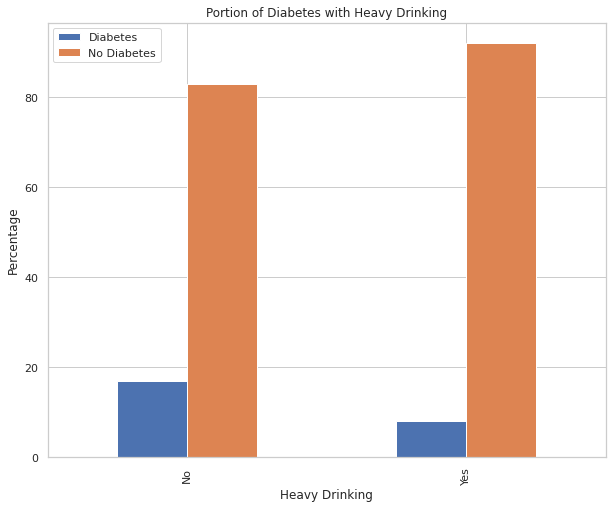

In [319]:
# Diabetes with heavy drinkers
fig, ax = plt.subplots(figsize=(10,8))
df_over.pipe(lambda df_over:( 
    (pd.crosstab(df_over._RFDRHV5, df_over.DIABETE3, normalize = 'index').round(2)*100)).
plot.bar(ax=ax))
ax.set_title("Portion of Diabetes with Heavy Drinking")
ax.set_ylabel("Percentage")
ax.set_xlabel("Heavy Drinking")
plt.legend(['Diabetes', 'No Diabetes'],loc='upper left', title='')

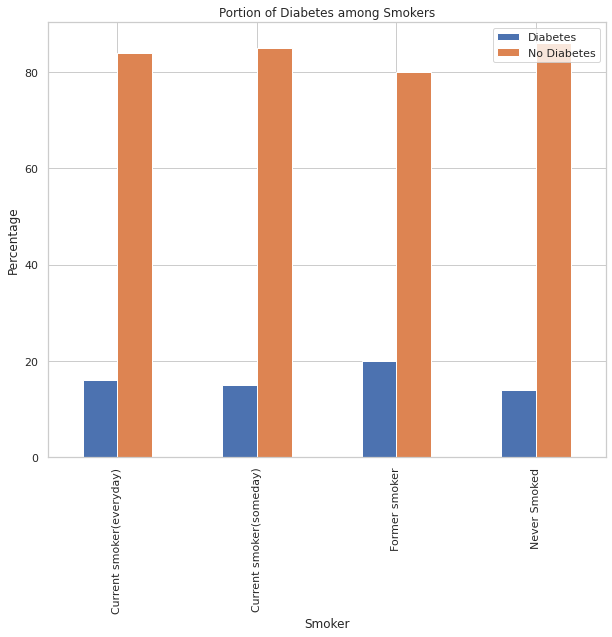

In [320]:
# Diabetes with smokers
fig, ax = plt.subplots(figsize=(10,8))
df_over.pipe(lambda df_over:( 
    (pd.crosstab(df_over._SMOKER3, df_over.DIABETE3, normalize = 'index').round(2)*100)).
plot.bar(ax=ax))
ax.set_title("Portion of Diabetes among Smokers")
ax.set_ylabel("Percentage")
ax.set_xlabel("Smoker")
plt.legend(['Diabetes', 'No Diabetes'],loc='upper right', title='')

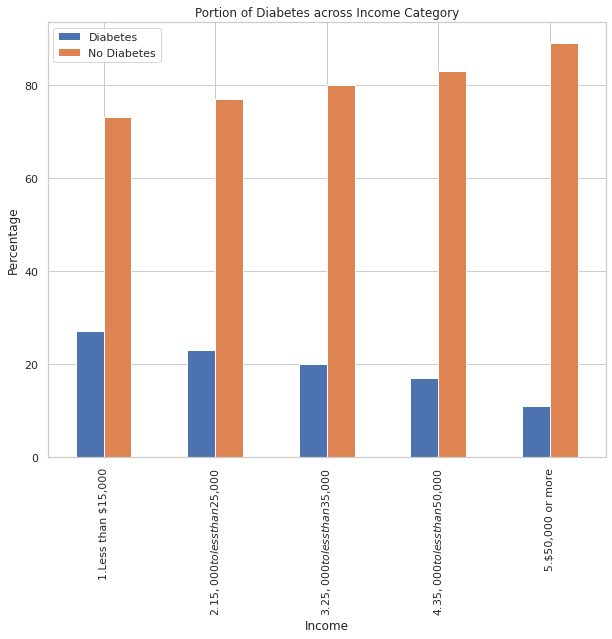

In [321]:
# Diabetes across income categories
fig, ax = plt.subplots(figsize=(10,8))
df_over.pipe(lambda df_over:( 
    (pd.crosstab(df_over._INCOMG, df_over.DIABETE3, normalize = 'index').round(2)*100)).
plot.bar(ax=ax))
ax.set_title("Portion of Diabetes across Income Category")
ax.set_ylabel("Percentage")
ax.set_xlabel("Income")
plt.legend(['Diabetes', 'No Diabetes'],loc='upper left', title='')

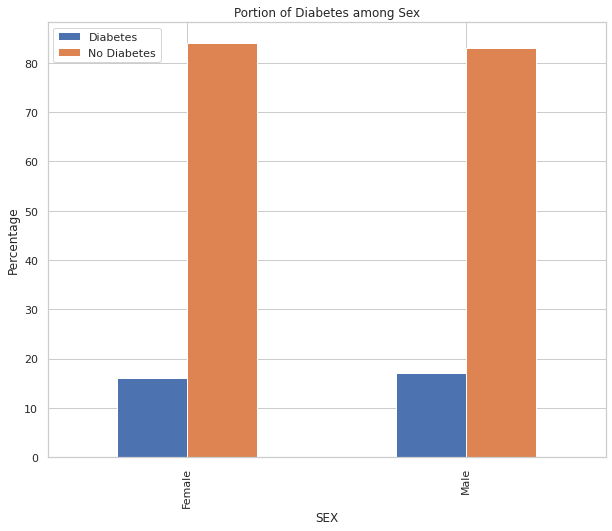

In [322]:
# Diabetes with heavy drinkers
fig, ax = plt.subplots(figsize=(10,8))
df_over.pipe(lambda df_over:( 
    (pd.crosstab(df_over.SEX, df_over.DIABETE3, normalize = 'index').round(2)*100)).
plot.bar(ax=ax))
ax.set_title("Portion of Diabetes among Sex")
ax.set_ylabel("Percentage")
plt.legend(['Diabetes', 'No Diabetes'],loc='upper left', title='')